In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Data

In [3]:
train_data = pd.read_csv('/content/drive/My Drive/Parcours_IML/IML_Projet_8/Data/train.csv',sep=',')
test_data = pd.read_csv('/content/drive/My Drive/Parcours_IML/IML_Projet_8/Data/test.csv',sep=',')

# Data Analysis

## Data shape

In [4]:
print('training_data shape : {}'.format(train_data.shape))
print('test_data shape : {}'.format(test_data.shape))

training_data shape : (7613, 5)
test_data shape : (3263, 4)


In [5]:
print('train_data columns : {}'. format(train_data.columns))
print('test_data columns : {}'. format(test_data.columns))

train_data columns : Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
test_data columns : Index(['id', 'keyword', 'location', 'text'], dtype='object')


## Check filling state of each columns

In [6]:
#verifier l'état de remplissage du dataset combiné
print((train_data.isna().sum()/train_data.shape[0]).sort_values(ascending = True))

id          0.000000
text        0.000000
target      0.000000
keyword     0.008013
location    0.332720
dtype: float64


In [7]:
#verifier l'état de remplissage du dataset combiné
print((test_data.isna().sum()/test_data.shape[0]).sort_values(ascending = True))

id          0.000000
text        0.000000
keyword     0.007968
location    0.338645
dtype: float64


There are values missing from keyword and location columns. filling those missing values with no_keyword and no_location.

In [8]:
train_data['keyword'] = train_data['keyword'].fillna('no_keyword')
train_data['location'] = train_data['location'].fillna('no_location')
test_data['keyword'] = test_data['keyword'].fillna('no_keyword')
test_data['location'] = test_data['location'].fillna('no_location')

## Keywords Distribution

### Number of unqique key_words

In [9]:
print('Number of unique keyword in training dataset : {}'.format(len(train_data.keyword.value_counts())))
print('Number of unique keyword in test dataset : {}'.format(len(test_data.keyword.value_counts())))

Number of unique keyword in training dataset : 222
Number of unique keyword in test dataset : 222


### keyword distribution per class

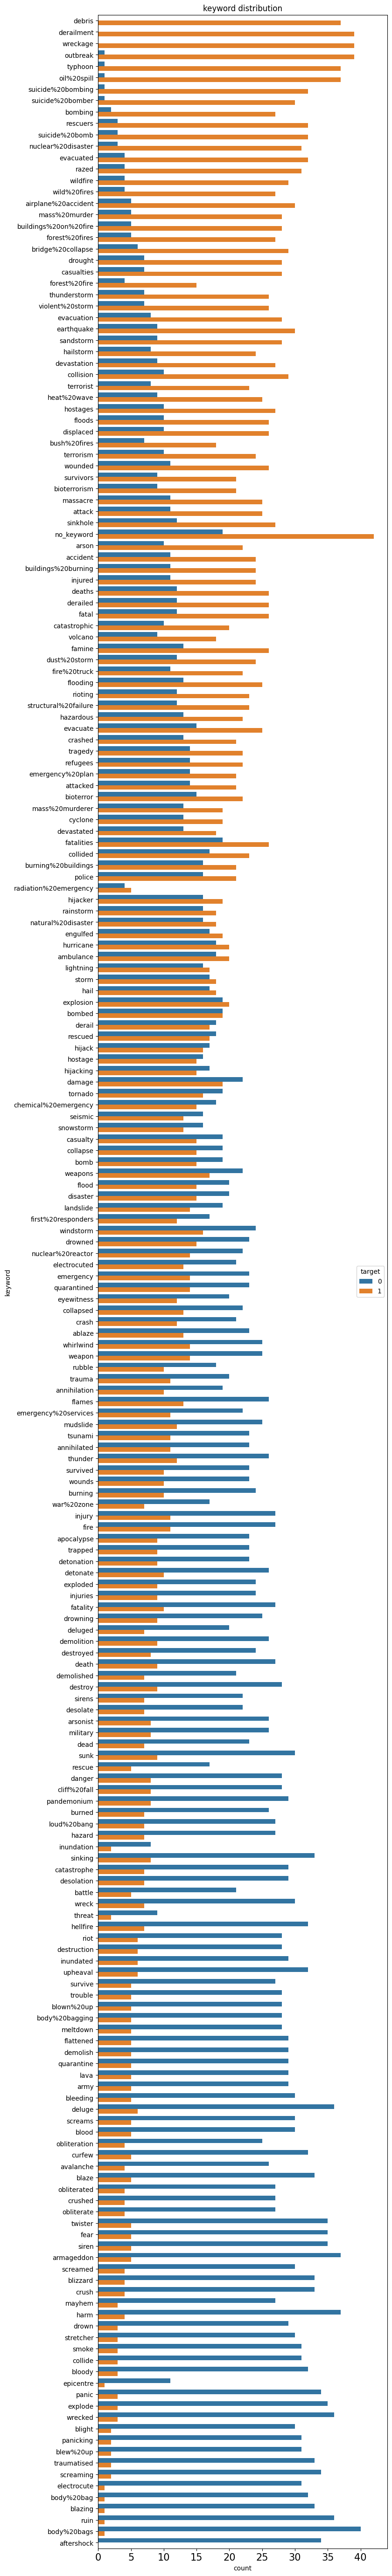

In [10]:
train_data['target_mean'] = train_data.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize = (8,72), dpi=100)
sns.countplot(y=train_data.sort_values(by='target_mean' , ascending = False)['keyword'], hue = train_data.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 10)
plt.title('keyword distribution')
plt.show()
train_data = train_data.drop(columns = ['target_mean'])

some keyword are much present in desaster tweet than other we will see later how we can use that to improve our prediction

## Number of tweet per class

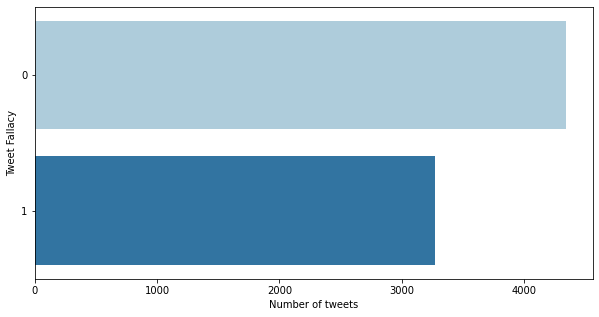

In [11]:
#Visualizing class distribution 
plt.figure(figsize=(10,5))
sns.countplot(y='target',data = train_data,palette="Paired")
plt.ylabel("Tweet Fallacy")
plt.xlabel("Number of tweets")
plt.show()

## Number of word per class of tweet

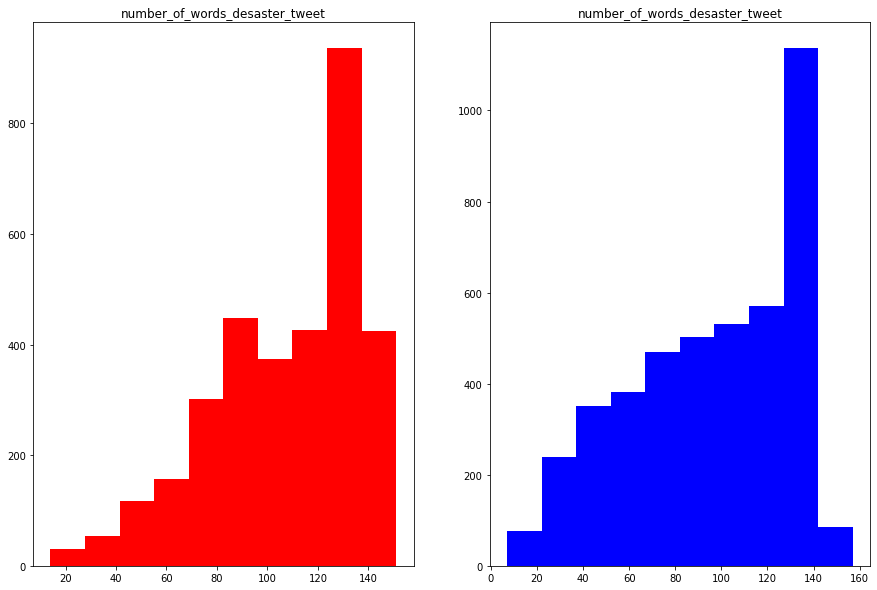

In [12]:
number_of_words_desaster_tweet = train_data[train_data.target==1].text.str.len()
number_of_words_non_desaster_tweet = train_data[train_data.target==0].text.str.len()
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,10))
ax1.hist(number_of_words_desaster_tweet, color = 'red')
ax2.hist(number_of_words_non_desaster_tweet, color  = 'blue')
ax1.set_title("number_of_words_desaster_tweet")
ax2.set_title("number_of_words_desaster_tweet")
plt.show()

## Word Cloud of most frequent words in desaster tweet

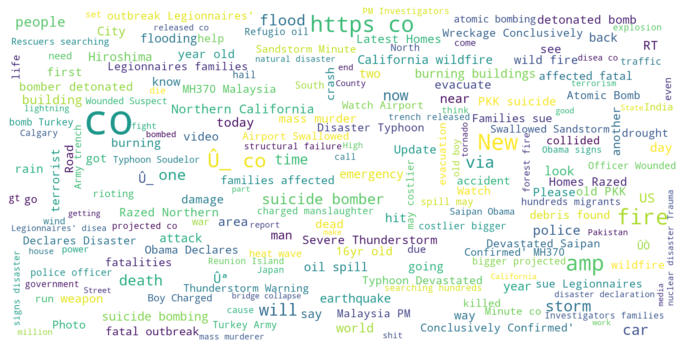

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#Disaster Tweets wordcloud 
disaster_tweets = train_data[train_data.target == 1]
disaster_string = []
for t in disaster_tweets.text:
    disaster_string.append(t)
disaster_string = pd.Series(disaster_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(disaster_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Word Cloud of most frequent words in non desaster tweet

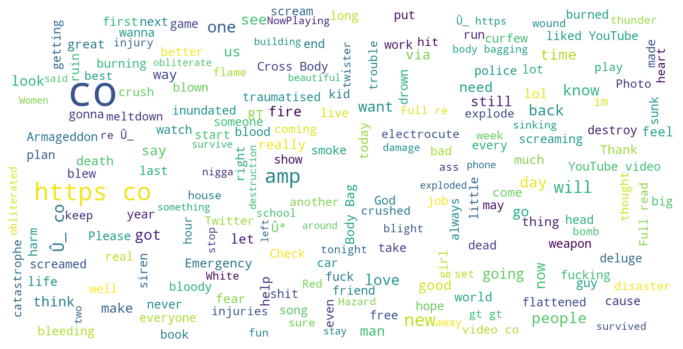

In [14]:
# Positive tweets wordcloud
formal_tweets = train_data[train_data.target == 0]
formal_string = []
for t in formal_tweets.text:
    formal_string.append(t)
formal_string = pd.Series(formal_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(formal_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Most Frequent words

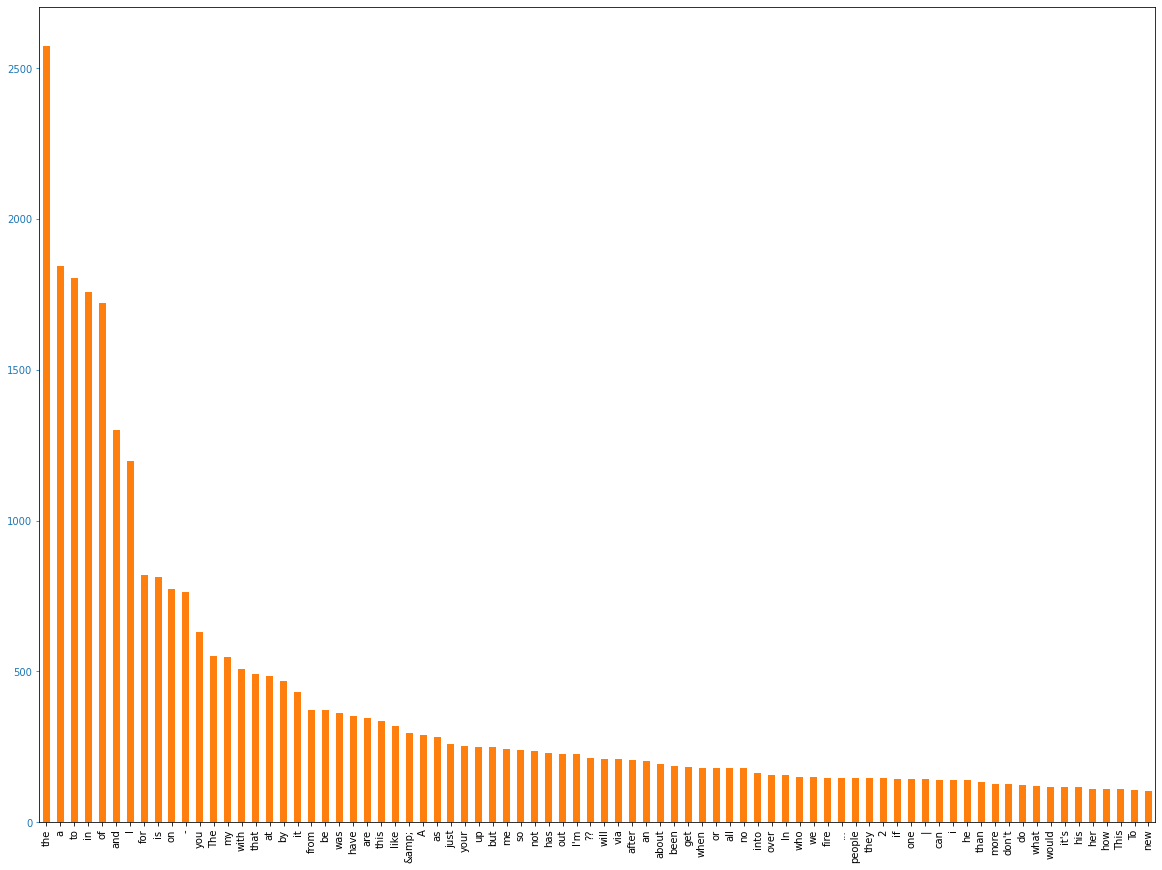

In [15]:
word_list = []
for i in range(len(train_data.text)):
  for words in train_data.text[i].split():
    word_list.append(words)
# caractéristique de la courbe
fig = plt.figure(figsize = (20,15))
ax1 = plt.subplot()
# histogramme
ax1 = pd.Series(word_list).value_counts().sort_values(ascending=False)[0:80].plot(kind='bar',color="C1")
plt.xticks(rotation=90)
# couleurs
ax1.tick_params(axis="y", colors="C0")
# Annotations
plt.xticks(rotation=90)
plt.show()

There are a lot of stop of stopwords, and other words that don't contribute to the meaning. We will continue with the cleaning process in another notebook